Columns:
- The dataset includes columns such as:
- user_id: Unique identifier for each user.
- feature_used: Type of feature accessed (e.g., "Colorblind Mode," "Multilingual," "Visual Aid").
- session_duration: Length of the user’s session (in minutes).
- engagement_score: Engagement level on a scale from 1 to 5.
- accessibility_settings: Count of customizations enabled (0-5).
- age_group: Categorizes users by age group.
- gender: Gender (e.g., "Male," "Female," "Non-Binary").
- additional_attributes: Additional user demographics (e.g., "LGBTQ+" or "Person of Color").

In [9]:
pip install -q --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -q matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install -q plotly

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install -q nbformat


Note: you may need to restart the kernel to use updated packages.


# Reading Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [21]:
# Read the Excel file
df = pd.read_excel('inclusive_features_usage.xlsx')
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   feature_used            10000 non-null  object 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  object 
 6   gender                  6003 non-null   object 
 7   additional_attributes   3997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [23]:
df["gender"].value_counts()

gender
Male          2029
Female        1990
Non-Binary    1984
Name: count, dtype: int64

In [24]:
missing_values = df.isnull().sum()
print(missing_values)

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64


## Data Cleaning

### Dealing with Missing values for gender (Unimportant for the analysis, important to retain the user information in the analysis)

In [25]:
df["gender"].fillna("Unknown", inplace=True)
df["gender"].value_counts()

/var/folders/zp/sq6bzsp91fz1sl3107mgk5gc0000gn/T/ipykernel_11657/3949538134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].fillna("Unknown", inplace=True)


gender
Unknown       3997
Male          2029
Female        1990
Non-Binary    1984
Name: count, dtype: int64

### Dealing with Missing values for Additional Attributes

In [27]:
df["additional_attributes"].value_counts()

additional_attributes
Person of Color    2018
LGBTQ+             1979
Name: count, dtype: int64

In [28]:
df["additional_attributes"].fillna("No Attributes", inplace=True)

In [29]:
missing_values = df.isnull().sum()
print(missing_values)

user_id                   0
feature_used              0
session_duration          0
engagement_score          0
accessibility_settings    0
age_group                 0
gender                    0
additional_attributes     0
dtype: int64


In [33]:
missing_values = df['session_duration'].isnull().sum()
print(f"Number of missing values in 'session_duration': {missing_values}")

Number of missing values in 'session_duration': 0


## Exploratory Phase

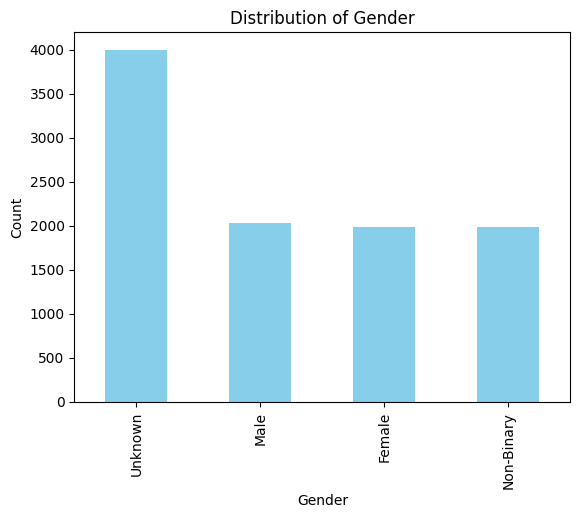

In [30]:
gender_counts = df["gender"].value_counts()
gender_counts.plot(kind='bar', color='skyblue', title='Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

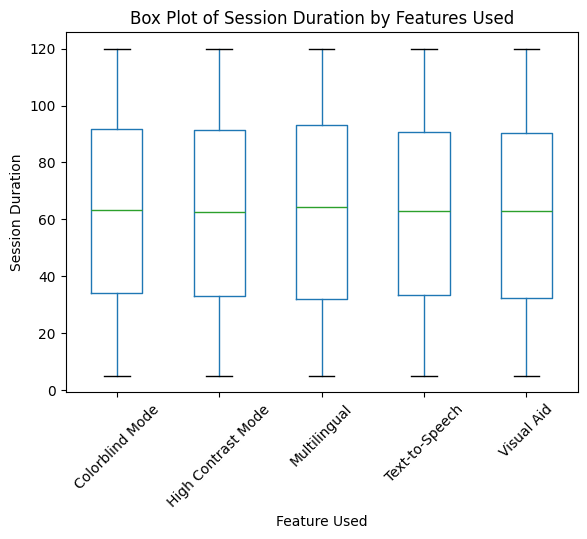

In [36]:
plt.figure(figsize=(12, 6))
df.boxplot(column='session_duration', by='feature_used', grid=False)
plt.title('Box Plot of Session Duration by Features Used')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Feature Used')
plt.ylabel('Session Duration')
plt.xticks(rotation=45)
plt.show()

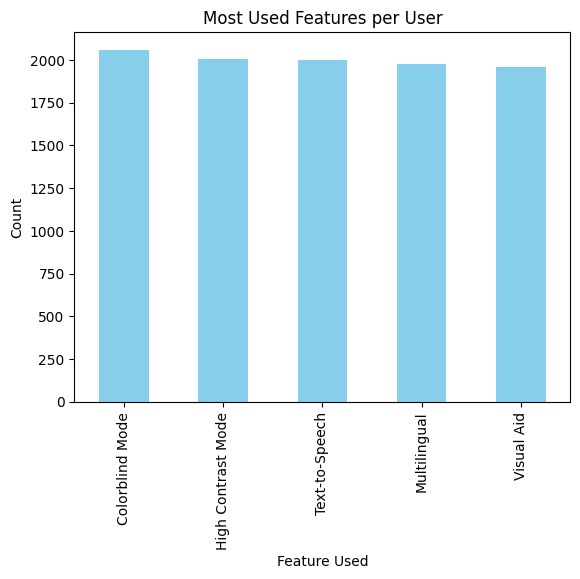

In [35]:
# Count the occurrences of each feature used
feature_counts = df['feature_used'].value_counts()

# Plot the bar chart
feature_counts.plot(kind='bar', color='skyblue', title='Most Used Features per User')
plt.xlabel('Feature Used')
plt.ylabel('Count')
plt.show()